In [9]:
import numpy as np

In [5]:
from sklearn.datasets import make_blobs

n_samples = 250
x, y = make_blobs(n_samples=n_samples, 
                             centers=([2.5, 3], [6.7, 7.9]), 
                             random_state=0)

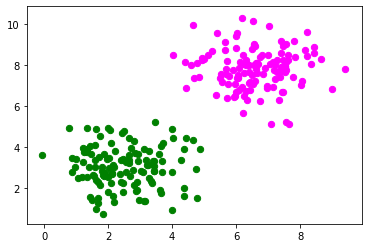

In [17]:
import matplotlib.pyplot as plt

colours = ('green', 'magenta', 'blue', 'cyan', 'yellow', 'red')
fig, ax = plt.subplots()

for n_class in range(2):
    ax.scatter(x[y==n_class][:, 0], x[y==n_class][:, 1], 
               c=colours[n_class], s=40, label=str(n_class))

In [26]:
from sklearn.linear_model import Perceptron

# training the sklearn Perceptron
clf = Perceptron(random_state=None, eta0= 0.1, shuffle=False, fit_intercept=False)
# add bias to X's first column
ones = np.ones(x.shape[0]).reshape(x.shape[0], 1)
X = np.append(ones, x, axis=1)
clf.fit(X, y)

# clf = Perceptron(random_state=None, eta0= 0.1, shuffle=False, fit_intercept=True)
# clf.fit(x, y)
# y_predict = clf.predict(x)
w = clf.coef_[0]
print("sklearn weights:\n", w)

sklearn weights:
 [-3.4         0.50339904  0.17563946]


In [36]:
def plot_decision_boundry(x, w):
    xx = np.arange(np.max(x[:,0]))
    m = -w[1] / w[2]
    b = -w[0] / w[2]

    print(m, c)
    fig, ax = plt.subplots()
    for n_class in range(2):
        ax.scatter(x[y==n_class][:, 0], x[y==n_class][:, 1], 
                   c=colours[n_class], s=40, label=str(n_class))
    # ax.plot(xx, m * xx + c )
    # plt.plot()
    # plt.show()

    x_min = min(x[:, 0])
    x_max = max(x[:, 0])
    xx = [x_min, x_max]
    yy = [m*x_min+b, m*x_max+b]
    plt.plot(xx, yy, ':g', label='Decision Boundary')
    plt.show()

-1.075518743128145 19.35783726424193


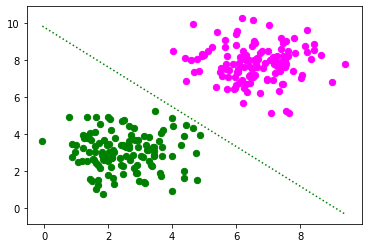

In [37]:
plot_decision_boundry(x, w)

In [42]:
w = np.zeros(X.shape[1])
epochs = 100
eta = 0.1
for epoch in range(epochs):
#     misclassified = 0
    for i, xi in enumerate(X):
        yi = y[i]
        a = np.dot(xi, w)
        if a > 0:
            yhat = 1.
        else:
            yhat = 0.
        w = w - eta*(yhat-yi)*xi

w

array([-3.4       ,  0.37343208,  0.34721113])

-1.075518743128145 19.35783726424193


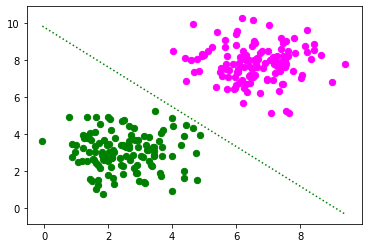

In [43]:
plot_decision_boundry(x, w)